**Convolutional Neural Networks for Image Classification**

In [0]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [0]:
single_image = X_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

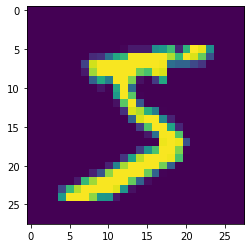

In [9]:
plt.imshow(single_image)

In [10]:
y_train[0]

5

**Preproccessing the Data**

In [0]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_example = to_categorical(y_test,num_classes=10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
y_cat_test = to_categorical(y_test)

**Normalizing the Data**

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
scaled_image = X_train[0]

In [20]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Rescaling the Image**

In [0]:
# batch_size,height,width,channels
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_test = X_test.reshape(10000,28,28,1)


**Model Creation**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [42]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1481 - acc: 0.9553 - val_loss: 0.0537 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0488 - acc: 0.9851 - val_loss: 0.0456 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0310 - acc: 0.9908 - val_loss: 0.0428 - val_acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0380 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0149 - acc: 0.9955 - val_loss: 0.0448 - val_acc: 0.9867


In [0]:
metric = pd.DataFrame(model.history.history)

**Model Evaluation**

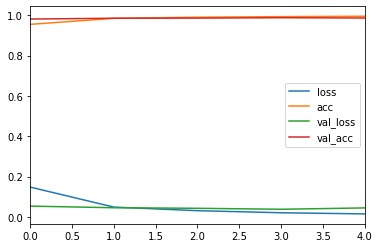

In [44]:
metric.plot()

In [45]:
metric

,loss,acc,val_loss,val_acc
0,0.148056,0.955283,0.053651,0.9816
1,0.048830,0.985050,0.045590,0.9856
2,0.030983,0.990850,0.042828,0.9863
3,0.020738,0.993550,0.037981,0.9883
4,0.014936,0.995500,0.044751,0.9867


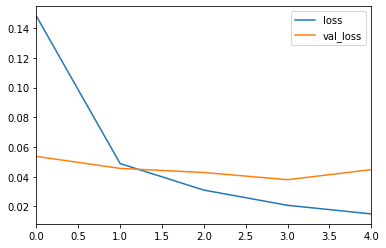

In [47]:
metric[['loss','val_loss']].plot()

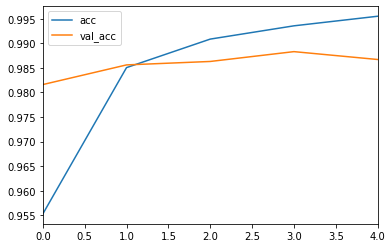

In [48]:
metric[['acc','val_acc']].plot()

In [49]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0448 - acc: 0.9867


[0.04475118161029968, 0.9867]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
prediction = model.predict_classes(X_test)

In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Model Testing**

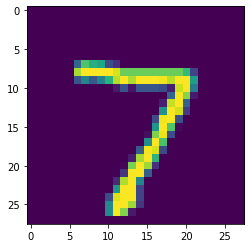

In [63]:
plt.imshow(X_test[0].reshape(28,28))

In [0]:
my_number = X_test[0]

In [60]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])